**GOAL**: train a model to predict cancer classification based on electrical impedence.

- **Supervised learning**: determine most important features, use models to predict classification. 
- **Unsupervised learning**: explore the data structure. Are there any categories?
- **Neural Network**: train a neural network classifier.


In [1]:
import pandas as pd

# Imports custom functions. see ./functions folder.
from functions.wrangling import preprocessing, decode_column, c_concatenate 
from functions.plotting import scatter_plot, bar_plot, corr_mx, summary_plot
from functions.ft_selection import RF_train_test
from functions.unsup_learn import UMAP_reduction, DBSCAN_cluster

In [2]:
dataset = pd.read_csv("./data/breast_cancer_data.csv")

preprocessed_df, encodings_cat, label_encoders, num_scalers = preprocessing(dataset)
preprocessed_df

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,1,0.112972,0.802733,-0.444444,0.536122,0.641729,0.604978,0.281603,0.642777,0.099598
1,1,-0.044376,1.188728,1.458689,0.001871,0.130963,0.438043,0.449141,0.006550,-0.052245
2,1,0.134850,1.243382,-0.188034,0.714815,1.341855,1.262955,0.591378,0.815615,0.196502
3,1,-0.003988,1.325363,1.629630,0.083691,0.441685,1.015013,0.784501,0.038523,0.038390
4,1,-0.017856,0.932536,1.287749,0.020523,0.148619,0.448271,0.443365,0.031557,-0.028421
...,...,...,...,...,...,...,...,...,...,...
101,0,1.304586,0.015371,0.153846,1.982464,5.255435,2.675343,2.815780,1.990937,1.584864
102,0,1.789242,0.930828,0.991453,4.678481,23.906670,6.496204,6.595360,4.600833,2.143296
103,0,0.981481,-0.327925,-1.247863,1.569147,1.448293,0.563373,1.048235,1.748336,0.990226
104,0,1.546914,-0.590948,0.410256,0.320954,0.397847,0.495925,2.368448,-0.252286,1.964896


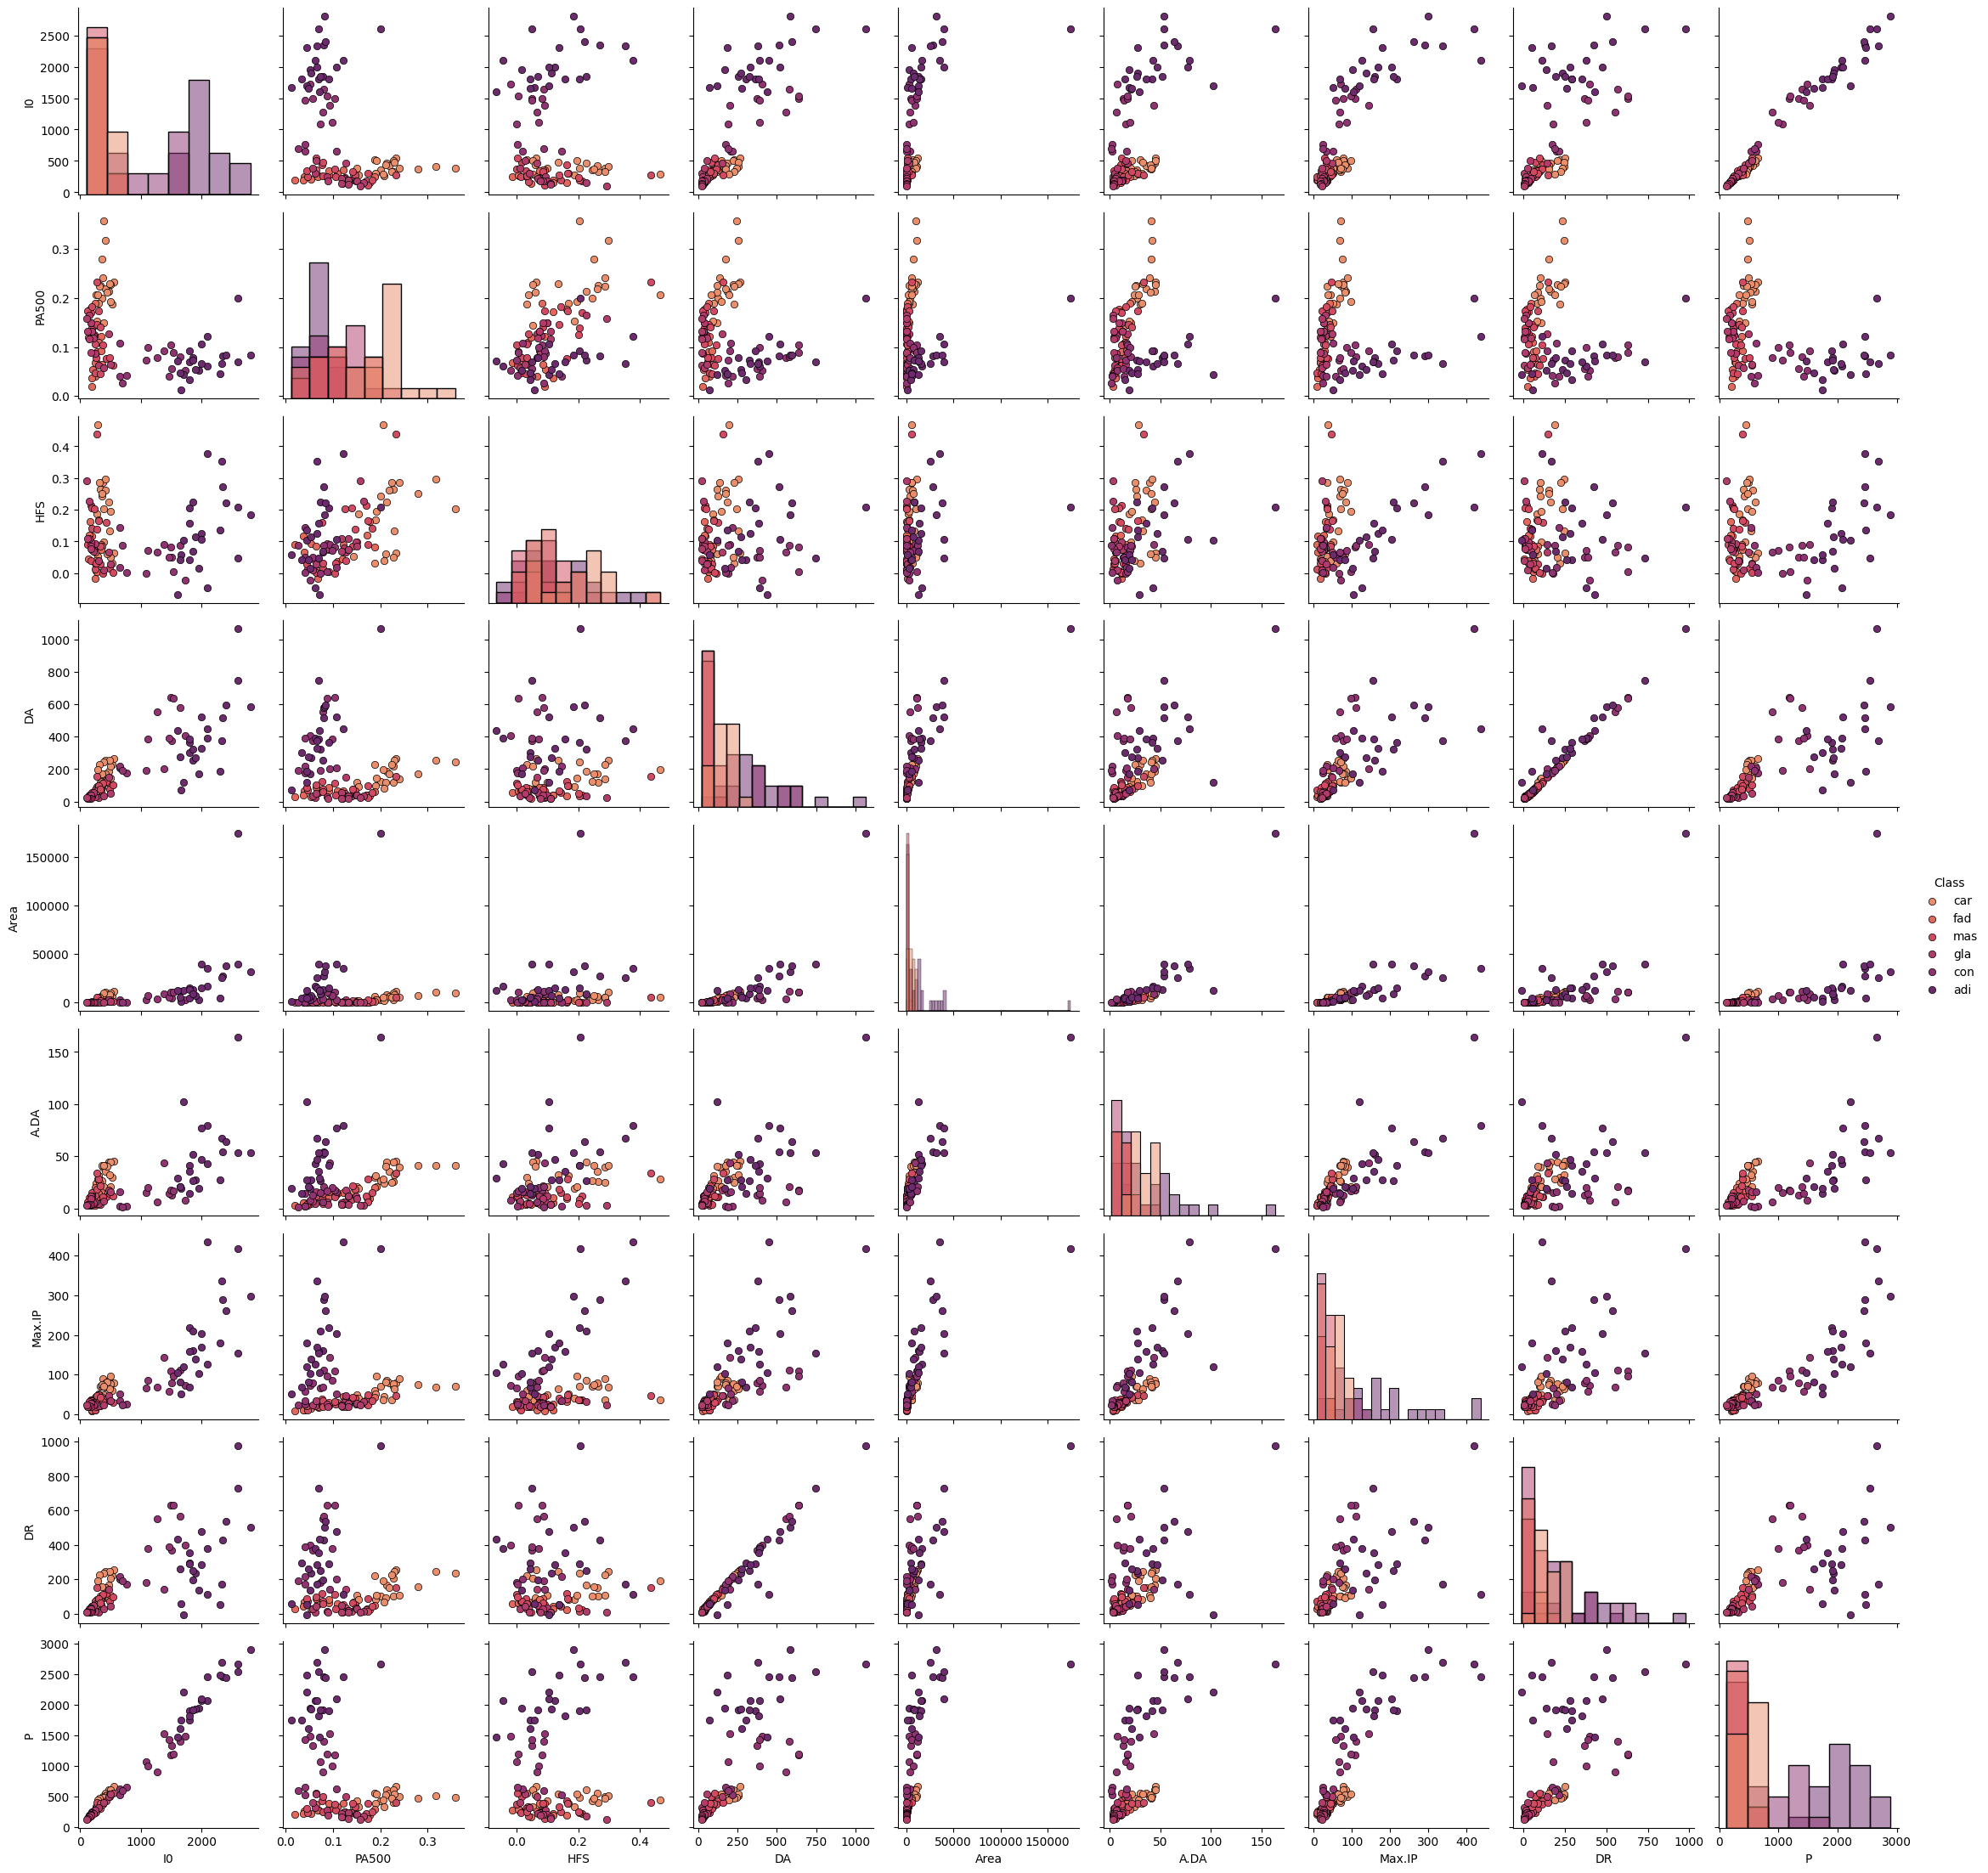

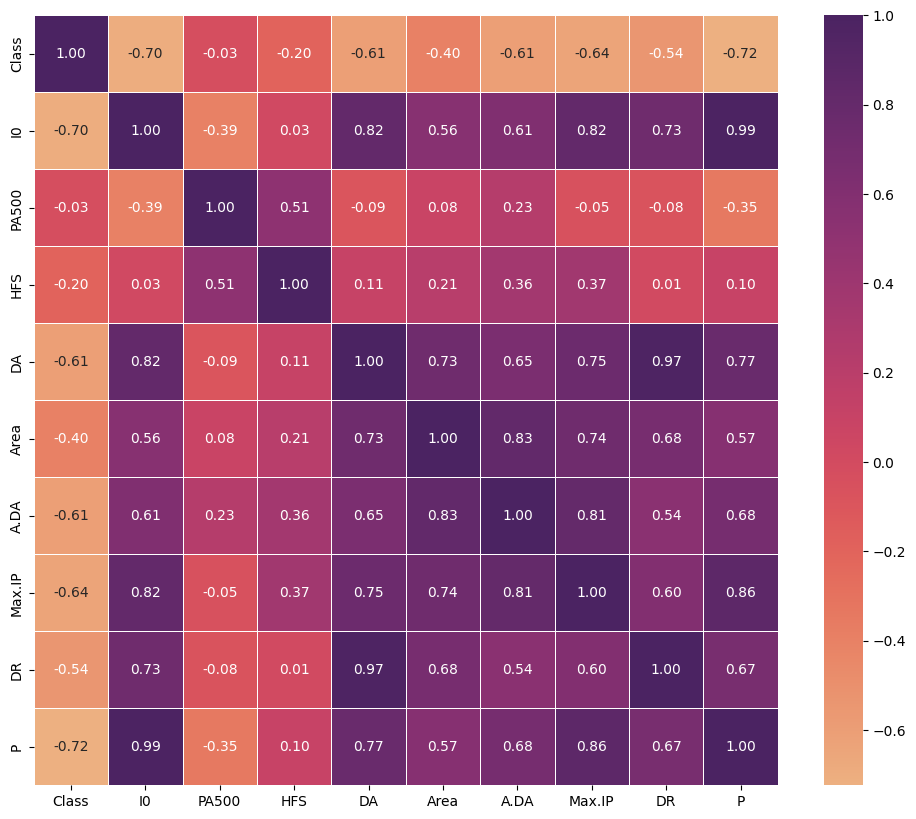

In [3]:
summary_plot(dataset, target="Class")

corr_mx(preprocessed_df)

Random forest accuracy 0.7272727272727273


/home/marcello/Data_analyses/breast_cancer_classification/functions/plotting.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  scatter = sns.barplot(data=df, x=labels[0], y=labels[1], palette='flare')


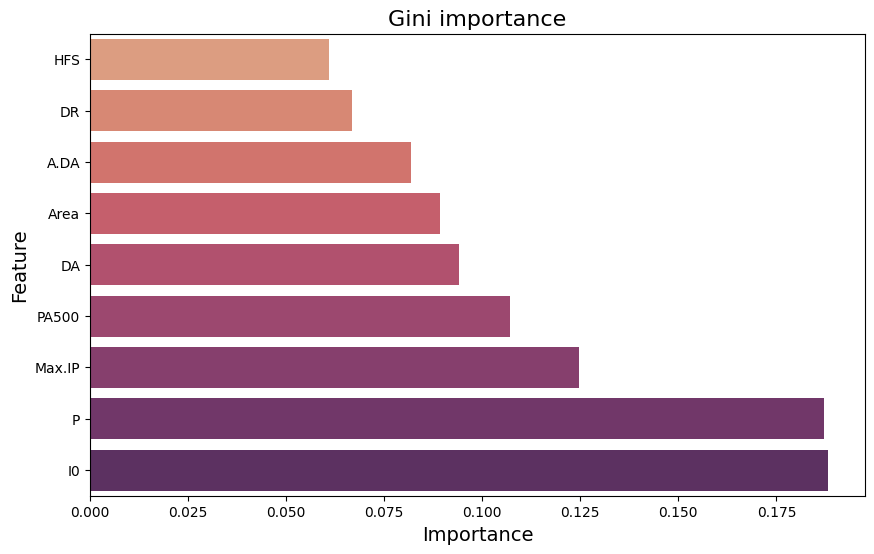

In [4]:
score, gini_importances,fitted_model =RF_train_test(preprocessed_df, randomizer=42,prediction_col="Class",type = "C")
print("Random forest accuracy", score)
bar_plot(gini_importances, labels=["Importance","Feature"], title="Gini importance")

important_feat_df = preprocessed_df[["Class", "P","I0","PA500","Area","Max.IP"]]


Removing all features, in this case, decreseased the predictive power of the model. 

This makes sense, as looking at the gini importance, the difference between the most and least important feature is relatively small.

Hence all features will be kept. 

In [5]:

iterations = 5 

results = pd.DataFrame()
for itr in range(0,iterations):
    score, gini_importances,fitted_model =RF_train_test(preprocessed_df, randomizer=42,prediction_col="Class",type = "C")
    
    score_flt, gini_importances_flt,fitted_model_flt =RF_train_test(important_feat_df, randomizer=42,prediction_col="Class",type = "C")

    # Save results to output df
    itr_results = pd.DataFrame({"Itr": [itr], "Not pruned": [score], "Pruned": [score_flt]})
    results = pd.concat([results, itr_results], ignore_index=True)


results

,Itr,Not pruned,Pruned
0,0,0.863636,0.772727
1,1,0.818182,0.772727
2,2,0.863636,0.772727
3,3,0.818182,0.772727
4,4,0.772727,0.772727


**Unsupervised learning**

In [ ]:
umap_df = UMAP_reduction(important_feat_df.drop(["Class"], axis=1))
db_clustered = DBSCAN_cluster(umap_df)


concatenated_df = c_concatenate(important_feat_df,db_clustered)
concatenated_df["Class"]=decode_column(concatenated_df,"Class",label_encoders["Class"])

scatter_plot(concatenated_df, labels=["umap1","umap2"], color_col="Class", title="UMAP colored by tissue class")
scatter_plot(concatenated_df, labels=["umap1","umap2"], color_col="cluster", title="UMAP colored by DBSCAN cluster")

**Neural Network**